## Import Library

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Loading Data

In [36]:
df = pd.read_csv("Fraud.csv")
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


## EDA

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
df["isFraud"].unique()

array([0, 1], dtype=int64)

In [37]:
df.rename(columns = {'nameOrig':'nameOrg', 'newbalanceOrig':'newbalanceOrg'}, inplace = True)

In [46]:
df.head(10)

,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


##### "nameOrg", "nameDest" and "isFlaggedFraud" does not affect any columns so we can drop the columns

In [38]:
df.drop(["nameDest","nameOrg","isFlaggedFraud"], axis=1, inplace= True)

In [109]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


### Checking Relation between ("type", "isFraud") 

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='type'>

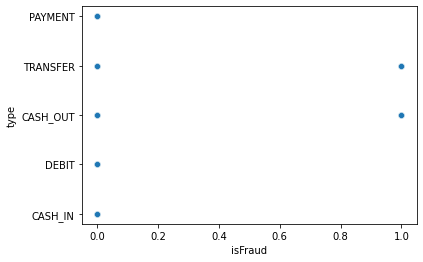

In [15]:
sns.scatterplot(df["isFraud"], df["type"])

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='isFraud'>

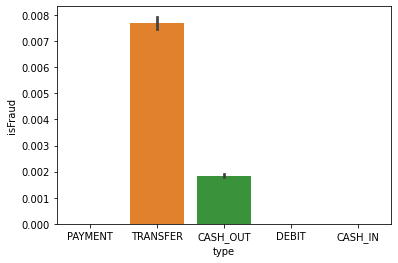

In [16]:
sns.barplot(df["type"], df["isFraud"])

##### From the above diagram we can see that "isFraud" strongly correlated to "type".

### Checking the ralation between "step", "type" and "isFraud"

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='step', ylabel='type'>

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


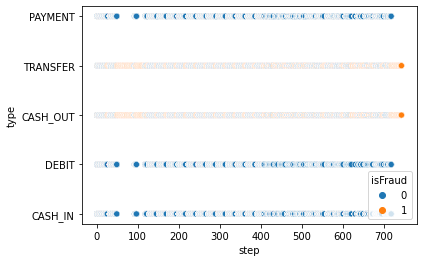

In [17]:
sns.scatterplot(df["step"], df["type"], hue=df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "step" is strongly correlate with "type". So we can remove the column

In [39]:
df.drop(["step"], axis=1, inplace=True)

### Checking the relation between "amount" and "isFraud"

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount', ylabel='isFraud'>

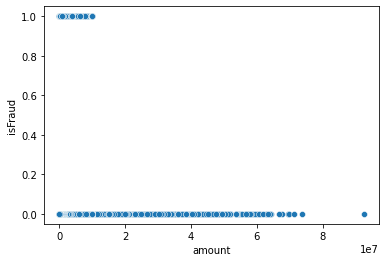

In [19]:
sns.scatterplot(df["amount"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "amount" is strongly correlate with "isFraud".

### Checking amount-oldbalanceOrg vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='isFraud'>

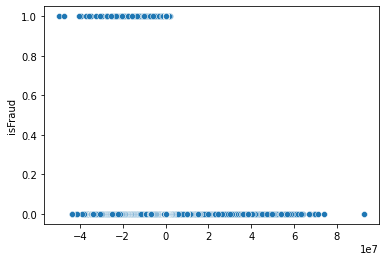

In [14]:
sns.scatterplot(df["amount"]-df["oldbalanceOrg"], df["isFraud"])

##### From the above diagram we can see that difference between "amount" and "oldbalanceOrg" is strongly correlate to "isfraud". So we add new column of difference of these two columns

In [40]:
df["Diff"] = df["amount"]-df["oldbalanceOrg"]
df.drop(["amount"], axis=1, inplace=True)
df

,type,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,Diff
0,PAYMENT,170136.00,160296.36,0.00,0.00,0,-160296.36
1,PAYMENT,21249.00,19384.72,0.00,0.00,0,-19384.72
2,TRANSFER,181.00,0.00,0.00,0.00,1,0.00
3,CASH_OUT,181.00,0.00,21182.00,0.00,1,0.00
4,PAYMENT,41554.00,29885.86,0.00,0.00,0,-29885.86
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,0.00,0.00,339682.13,1,0.00
6362616,TRANSFER,6311409.28,0.00,0.00,0.00,1,0.00
6362617,CASH_OUT,6311409.28,0.00,68488.84,6379898.11,1,0.00
6362618,TRANSFER,850002.52,0.00,0.00,0.00,1,0.00


### Checking amount-newbalanceOrg vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='isFraud'>

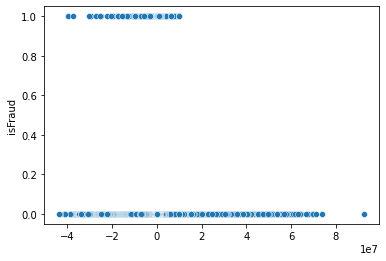

In [16]:
sns.scatterplot(df["amount"]-df["newbalanceOrg"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of difference "amount" and "newbalanceOrg" is strongly correlate with "isFraud".

### Checking oldbalanceOrg vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='isFraud'>

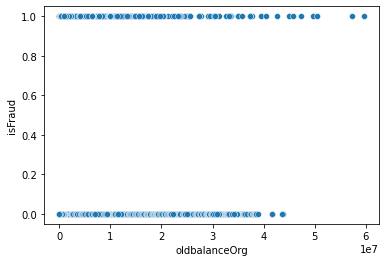

In [23]:
sns.scatterplot(df["oldbalanceOrg"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "oldbalanceOrg" is strongly correlate with "isFraud". So we can remove the column

In [41]:
df.drop(["oldbalanceOrg"], axis=1, inplace=True)

### Checking newbalanceOrg vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceOrg', ylabel='isFraud'>

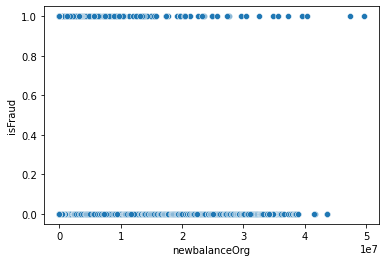

In [25]:
sns.scatterplot(df["newbalanceOrg"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "newbalanceOrg" is strongly correlate with "isFraud". So we can remove the column

In [42]:
df.drop(["newbalanceOrg"], axis=1, inplace=True)

### Checking amount-oldbalanceDest vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='isFraud'>

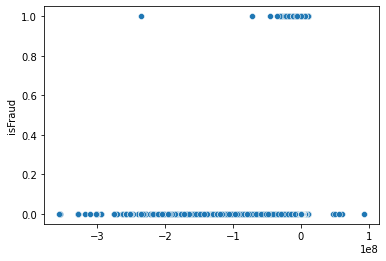

In [19]:
sns.scatterplot(df["amount"]-df["oldbalanceDest"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of difference "amount" and "oldbalanceDest" is strongly correlate with "isFraud".

### Checking amount-newbalanceDest vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='isFraud'>

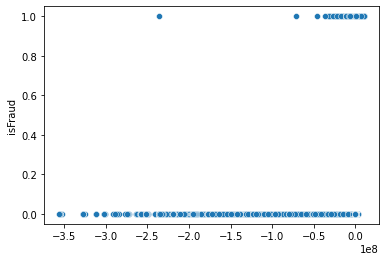

In [20]:
sns.scatterplot(df["amount"]-df["newbalanceDest"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of difference "amount" and "newbalanceDest" is strongly correlate with "isFraud".

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='isFraud'>

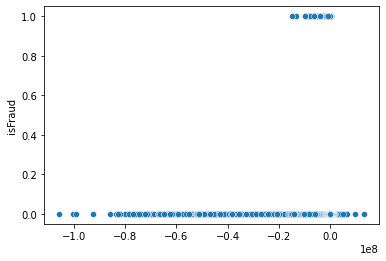

In [21]:
sns.scatterplot(df["oldbalanceDest"]-df["newbalanceDest"], df["isFraud"])

##### From the above diagram we can see that difference between "oldbalanceDest" and "newbalanceDest" is strongly correlate to "isFraud". So we add new column of difference of these two columns

In [43]:
df["Diff1"] = df["oldbalanceDest"]-df["newbalanceDest"]

In [11]:
df.head(10)

,type,oldbalanceDest,newbalanceDest,isFraud,Diff,Diff1
0,PAYMENT,0.0,0.00,0,-160296.36,0.00
1,PAYMENT,0.0,0.00,0,-19384.72,0.00
2,TRANSFER,0.0,0.00,1,0.00,0.00
3,CASH_OUT,21182.0,0.00,1,0.00,21182.00
4,PAYMENT,0.0,0.00,0,-29885.86,0.00
5,PAYMENT,0.0,0.00,0,-46042.29,0.00
6,PAYMENT,0.0,0.00,0,-176087.23,0.00
7,PAYMENT,0.0,0.00,0,-168225.59,0.00
8,PAYMENT,0.0,0.00,0,1353.36,0.00
9,DEBIT,41898.0,40348.79,0,-36382.23,1549.21


### Checking oldbalanceDest vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest', ylabel='isFraud'>

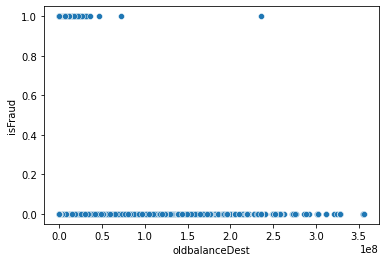

In [32]:
sns.scatterplot(df["oldbalanceDest"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "oldbalanceDest" is strongly correlate with "isFraud". So we can remove the column

In [44]:
df.drop(["oldbalanceDest"], axis=1, inplace=True)

### Checking newbalanceDest vs isFraud

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceDest', ylabel='isFraud'>

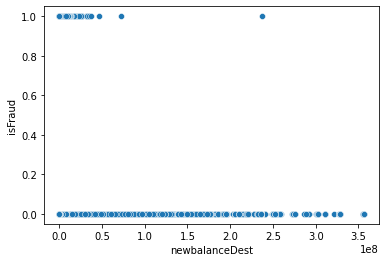

In [34]:
sns.scatterplot(df["newbalanceDest"], df["isFraud"])

##### From the above diagram we cann't identify the how much amount of "newbalanceDest" is strongly correlate with "isFraud". So we can remove the column

In [45]:
df.drop(["newbalanceDest"], axis=1, inplace=True)

## Relation between "Diff", "isFraud" and "type"

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diff', ylabel='isFraud'>

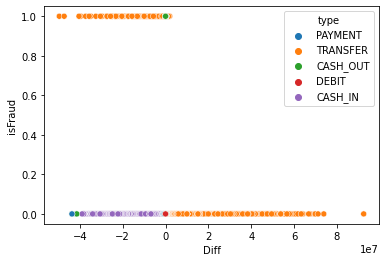

In [36]:
sns.scatterplot(df["Diff"], df["isFraud"], hue=df["type"])

## Relation between "Diff1", "isFraud" and "type"

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diff1', ylabel='isFraud'>

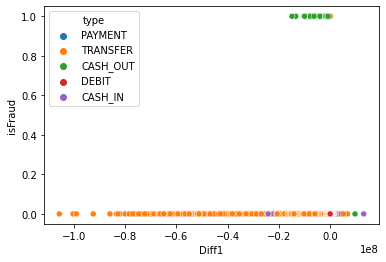

In [37]:
sns.scatterplot(df["Diff1"], df["isFraud"], hue=df["type"])

### Relation between "Diff", "Diff1" and "isFraud"

c:\users\vishwas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diff', ylabel='Diff1'>

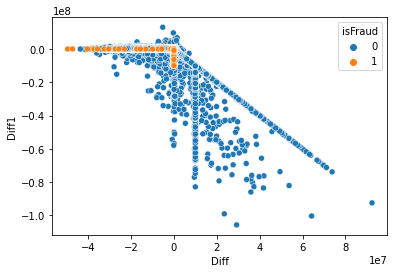

In [38]:
sns.scatterplot(df["Diff"], df["Diff1"], hue= df["isFraud"])

In [46]:
df1 = df

### Collecting the values of "Diff" and "Diff1" in 3(low, zero, high) categories

In [47]:
df1["Diff"] = pd.cut(df1['Diff'], bins=[-np.inf, -0.00001, 0, +np.inf], include_lowest=True, labels=['low', 'zero', 'high'])


df1["Diff1"] = pd.cut(df1['Diff1'], bins=[-np.inf, -0.00001, 0, +np.inf], include_lowest=True, labels=['low', 'zero', 'high'])



In [48]:
df1 = df1.reindex(columns=["type","Diff","Diff1","isFraud"])
df1.head(20)

,type,Diff,Diff1,isFraud
0,PAYMENT,low,zero,0
1,PAYMENT,low,zero,0
2,TRANSFER,zero,zero,1
3,CASH_OUT,zero,high,1
4,PAYMENT,low,zero,0
5,PAYMENT,low,zero,0
6,PAYMENT,low,zero,0
7,PAYMENT,low,zero,0
8,PAYMENT,high,zero,0
9,DEBIT,low,high,0


## Encoding the label

In [49]:
from sklearn.preprocessing import LabelEncoder

df1["type"] = LabelEncoder().fit_transform(df1.type)

df1["Diff"] = LabelEncoder().fit_transform(df1.Diff)

df1["Diff1"] = LabelEncoder().fit_transform(df1.Diff1)


In [50]:

df1.head(20)

,type,Diff,Diff1,isFraud
0,3,1,2,0
1,3,1,2,0
2,4,2,2,1
3,1,2,0,1
4,3,1,2,0
5,3,1,2,0
6,3,1,2,0
7,3,1,2,0
8,3,0,2,0
9,2,1,0,0


## Split the Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("isFraud", axis=1),
                                                    df1["isFraud"], test_size=0.33, random_state=0)

In [52]:
X_train.shape

(4262955, 3)

In [53]:
X_test.shape

(2099665, 3)

In [54]:
y_train.shape

(4262955,)

In [55]:
y_test.shape

(2099665,)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 4 columns):
 #   Column   Dtype
---  ------   -----
 0   type     int32
 1   Diff     int32
 2   Diff1    int32
 3   isFraud  int64
dtypes: int32(3), int64(1)
memory usage: 121.4 MB


## Train the model into "Decision Tree"

In [57]:
Predictor = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
Predictor.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

## Test The Model

In [58]:
predictions = Predictor.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Check Accuracy Score

In [59]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9999928560032195

## Visualization of Tree

[Text(167.4, 195.696, 'X[1] <= 1.5\ngini = 0.003\nsamples = 4262955\nvalue = [4257389, 5566]'),
 Text(111.60000000000001, 152.208, 'X[0] <= 3.5\ngini = 0.0\nsamples = 4257499\nvalue = [4257389, 110]'),
 Text(55.800000000000004, 108.72, 'gini = 0.0\nsamples = 3903233\nvalue = [3903215, 18]'),
 Text(167.4, 108.72, 'X[2] <= 1.5\ngini = 0.001\nsamples = 354266\nvalue = [354174, 92]'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 354114\nvalue = [354109, 5]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 0.5\ngini = 0.49\nsamples = 152\nvalue = [65, 87]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]'),
 Text(279.0, 21.744, 'gini = 0.138\nsamples = 94\nvalue = [7, 87]'),
 Text(223.20000000000002, 152.208, 'gini = 0.0\nsamples = 5456\nvalue = [0, 5456]')]

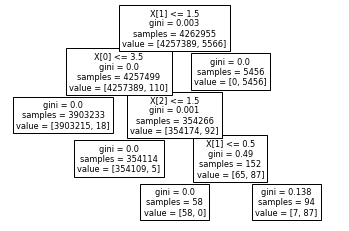

In [66]:
tree.plot_tree(Predictor)